In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
from spellchecker import SpellChecker
import string  
import re
import nltk

In [2]:
df=pd.read_csv(r'filtered_tweet.csv',sep=',',names=["tweet","class"])

In [ ]:
pd.set_option('display.max_colwidth', -1)
df.tweet[:10]

In [3]:
import nltk
nltk.download('wordnet')
nltk.download('words')
from nltk.corpus import words
word_list = set(words.words())
def preprocess_text(s):
    #remove numbers from texts
    remove_num=''.join([i for i in s if not i.isdigit()])
    remove_num=remove_num.strip()
        
    #Tokenize the senetence
    tokenizer=nltk.tokenize.WhitespaceTokenizer()
    tokens=tokenizer.tokenize(remove_num)
    
    #remove all 2 length words
    pre1=[i for i in tokens if  len(i)>2]
    
    #handling spell correction
    
    #running too slow
    '''
    spell=SpellChecker()
    pre2=[]
    for i in pre1:
        if i[-2:]!="nt" and not i in word_list:
            pre2.append(spell.correction(i))
        else:
            pre2.append(i)
    '''
    
    #Lemmatization
    lemma=nltk.stem.WordNetLemmatizer()
    final_string=' '.join([lemma.lemmatize(i) for i in pre1])
    
    '''
    print(s)
    print(remove_num)
    print(tokens)
    print(pre1)
    print(pre2)
    print(final_string)
    '''
    
    return final_string
preprocess_text("rt womaan shouldnt complain cleanng house amp man always takee trsh ")

[nltk_data] Downloading package wordnet to C:\Users\Pravash
[nltk_data]     Ranjan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Pravash
[nltk_data]     Ranjan\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


'womaan shouldnt complain cleanng house amp man always takee trsh'

In [4]:
df["c_tweet"]=""

In [5]:
for i in tqdm(range(len(df))):
    df.loc[i,"c_tweet"]=preprocess_text(df.loc[i,"tweet"])

C:\Users\Pravash Ranjan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [6]:
pd.set_option('display.max_colwidth', -1)
df.tweet[:10]

C:\Users\Pravash Ranjan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


0    rt woman shouldnt complain cleaning house amp man always take trash       
1    rt boy dats coldtyga dwn bad cuffin dat hoe 1st place                     
2    rt dawg rt ever fuck bitch start cry confused shit                        
3    rt look like tranny                                                       
4    rt shit hear might true might faker bitch told ya 57361                   
5    shit blows meclaim faithful somebody still fucking hoes 128514128514128514
6    sit hate another bitch got much shit going                                
7    8220 cause im tired big bitches coming us skinny girls8221                
8    amp might get ya bitch back amp thats                                     
9    hobbies include fighting mariam bitch                                     
Name: tweet, dtype: object

In [7]:
pd.set_option('display.max_colwidth', -1)
df.c_tweet[:10]

C:\Users\Pravash Ranjan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


0    woman shouldnt complain cleaning house amp man always take trash
1    boy dat coldtyga dwn bad cuffin dat hoe place                   
2    dawg ever fuck bitch start cry confused shit                    
3    look like tranny                                                
4    shit hear might true might faker bitch told                     
5    shit blow meclaim faithful somebody still fucking hoe           
6    sit hate another bitch got much shit going                      
7    cause tired big bitch coming skinny girl                        
8    amp might get bitch back amp thats                              
9    hobby include fighting mariam bitch                             
Name: c_tweet, dtype: object

In [ ]:
preprocess_text("rt boy dats coldtyga dwn bad cuffin dat hoe 1st place ")

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tweets=df.c_tweet
tfidf=TfidfVectorizer(min_df=2,max_df=0.5,ngram_range=(1,2))
features=tfidf.fit_transform(tweets)
new_df=pd.DataFrame(features.todense(),columns=tfidf.get_feature_names())

In [9]:
len(new_df.columns)

22943

In [18]:
sum(new_df.iloc[0].values)

3.71516427405715

In [10]:
len(new_df)

24783

In [11]:
new_df["class"]=df["class"]

In [12]:
hate=new_df[(new_df["class"]==1) | (new_df["class"]==0)]
non_hate=new_df[new_df["class"]==2]
print(len(hate),len(non_hate))

20620 4163


In [13]:
train=hate[0:6000]
train_final=pd.concat([train,non_hate[0:3000]])
test=hate[6001:10001]
test_final=pd.concat([test,non_hate[3000:]])
train_final["class"].replace(0,1,inplace=True)
train_final["class"].replace(2,0,inplace=True)
test_final["class"].replace(0,1,inplace=True)
test_final["class"].replace(2,0,inplace=True)
print(train_final["class"].value_counts())
print(test_final["class"].value_counts())

1    6000
0    3000
Name: class, dtype: int64
1    4000
0    1163
Name: class, dtype: int64


In [14]:
from sklearn.utils import shuffle
train_final = shuffle(train_final)

In [62]:
test_final.to_csv("test_final.csv")

In [63]:
train_final.to_csv("train_final.csv")

In [15]:
X_train=(train_final.drop(["class"],axis=1)).values
y_train=train_final["class"].values
y_train=y_train.astype(np.float32)
X_test=(test_final.drop(["class"],axis=1)).values
y_test=test_final["class"].values
y_test=y_test.astype(np.float32)

In [16]:
X_train[X_train!=X_train]=0.0
X_test[X_test!=X_test]=0.0

In [17]:
new_df.shape

(24783, 22943)

In [18]:
import torch
X_train_tensor=torch.from_numpy(X_train)
y_train_tensor=torch.from_numpy(y_train)

X_test_tensor=torch.from_numpy(X_test)
y_test_tensor=torch.from_numpy(y_test)

y_train_tensor=torch.reshape(y_train_tensor,(y_train_tensor.shape[0],1))
y_test_tensor=torch.reshape(y_test_tensor,(y_test_tensor.shape[0],1))

In [77]:
#22942
import torch.nn as nn
class FirstNetwork_v2(nn.Module):
    
    def __init__(self):
        super().__init__()
        torch.manual_seed(0)
        self.net = nn.Sequential(
        nn.Linear(22942, 1), 
        nn.Sigmoid() 
        
    )
        

    def forward(self, X):
         return self.net(X)
        
        
def fit_v2(x, y, model, opt, loss_fn, epochs = 1,batch_size=30):
    ls=[]
    train=[]
    nh=[]
    test=[]
    
    no_of_batches=9000//batch_size
    for epoch in tqdm(range(epochs)):
        for i in range(no_of_batches):
            X_batch=x[i*batch_size:i*batch_size+batch_size,:]
            y_batch=y[i*batch_size:i*batch_size+batch_size,:]
            md=fn(X_batch.float())
            #print(md)
            #print(y)

            loss = loss_fn(md, y_batch)

            #print(i,loss)
            
            loss.backward()
            opt.step()
            opt.zero_grad()
        ls.append(loss.item())        
        train.append(((fn(X_train_tensor.float())>0.5).type(torch.int)==y_train_tensor).sum().item()/y_train.shape[0]*100)
        opt.zero_grad()
        test.append(((fn(X_test_tensor.float())>0.5).type(torch.int)==y_test_tensor).sum().item()/y_test.shape[0]*100)
        opt.zero_grad()
        
        #print(loss)
    print("Model: Logistic Regression , Loss fn: MSE , Optimizer: Adam , LR: 0.0001 , Epochs: 75 , Batch_size= 30")
    plt.plot(train,color="blue",label='Training Accuracy')
    plt.plot(test,color="red",label='Testing Accuracy')
    #plt.plot(nh,color="green",label='Non-Hate Accuracy')
    plt.xlabel("epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.show()    
    return ls

torch.Size([9000, 22942]) torch.Size([9000, 1])


C:\Users\Pravash Ranjan\anaconda3\lib\site-packages\ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Model: Logistic Regression , Loss fn: MSE , Optimizer: Adam , LR: 0.0001 , Epochs: 75 , Batch_size= 30


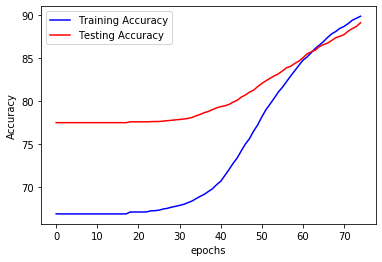

Model: Logistic Regression , Loss fn: MSE , Optimizer: Adam , LR: 0.0001 , Epochs: 75 , Batch_size= 30


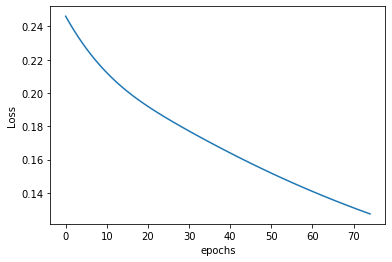

<Figure size 1080x1080 with 0 Axes>

In [78]:
import torch.nn.functional as F
from torch import optim
print(X_train_tensor.shape,y_train_tensor.shape)
fn = FirstNetwork_v2()
loss_fn = [nn.BCELoss(),F.mse_loss]
opt = optim.Adam(fn.parameters(), lr=.0001)
ls=fit_v2(X_train_tensor, y_train_tensor, fn, opt, loss_fn[1],epochs=75,batch_size=30)
print("Model: Logistic Regression , Loss fn: MSE , Optimizer: Adam , LR: 0.0001 , Epochs: 75 , Batch_size= 30")
plt.plot(ls)
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.figure(figsize=(15,15))
plt.show()

In [79]:
#Train Accuracy
((fn(X_train_tensor.float())>0.5).type(torch.int)==y_train_tensor).sum().item()/y_train.shape[0]*100

89.83333333333333

In [80]:
#Test Accuracy
((fn(X_test_tensor.float())>0.5).type(torch.int)==y_test_tensor).sum().item()/y_test.shape[0]*100

89.07611853573503

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus=["how are you" ,"good to see you"]
tf=TfidfVectorizer(ngram_range=(1,2))
feat=tf.fit_transform(corpus)
cl=tf.get_feature_names()
s=["are you lost or just fine"]
vector=[]
print("Text Corpus Example")
print(corpus)
print("Uni-grams and Bi-grams",cl)
ex_df=pd.DataFrame(feat.todense(),columns=cl)
ex_df

Text Corpus Example
['how are you', 'good to see you']
Uni-grams and Bi-grams ['are', 'are you', 'good', 'good to', 'how', 'how are', 'see', 'see you', 'to', 'to see', 'you']


,are,are you,good,good to,how,how are,see,see you,to,to see,you
0,0.471078,0.471078,0.000000,0.000000,0.471078,0.471078,0.000000,0.000000,0.000000,0.000000,0.335176
1,0.000000,0.000000,0.392044,0.392044,0.000000,0.000000,0.392044,0.392044,0.392044,0.392044,0.278943


In [82]:
sentence=df[df["class"]==2]["c_tweet"].values
vec=tfidf.transform(sentence).todense()
vev=vec[:,:-1]
res=fn(torch.tensor(vev).float())
print((len(sentence)-(res>0.5).sum().item()))
(len(sentence)-(res>0.5).sum().item())/len(sentence)

803


0.19288974297381695

In [81]:
cat=["Clean","Hate"]
sentence=["'cuteie pie","all jews are swine","you are a friendly person","shut up nigger","black people deserve to burn in hell"
         ,"what are you looking at , dumb fuck !","good people are found everywhere"]
vec=tfidf.transform(sentence).todense()
vev=vec[:,:-1]
res=fn(torch.tensor(vev).float())
for i in range(len(sentence)):
    print("\""+sentence[i]+"\" -",cat[int(res[i].item()>0.5)])

"'cuteie pie" - Hate
"all jews are swine" - Hate
"you are a friendly person" - Hate
"shut up nigger" - Hate
"black people deserve to burn in hell" - Hate
"what are you looking at , dumb fuck !" - Hate
"good people are found everywhere" - Hate


In [50]:
sentence=df[df["class"]==2]
sentence[:20]

,tweet,class,c_tweet
0,rt woman shouldnt complain cleaning house amp man always take trash,2,woman shouldnt complain cleaning house amp man always take trash
40,momma said pussy cats inside doghouse,2,momma said pussy cat inside doghouse
63,simplyaddictedtoguys woof woof hot scally lad,2,simplyaddictedtoguys woof woof hot scally lad
66,woof woof hot soles,2,woof woof hot sol
67,lemmie eat oreo amp dishes one oreo lol,2,lemmie eat oreo amp dish one oreo lol
70,eggplant emoji doey say looked like scream lmao,2,eggplant emoji doey say looked like scream lmao
75,baby monkey bathtime awwwwe soooo adorable,2,baby monkey bathtime awwwwe soooo adorable
115,baseball season win yankees love started,2,baseball season win yankee love started
118,im early bird im night owl im wise worms,2,early bird night owl wise worm
119,overdosing heavy drugs doesnt sound bad tonight pussy shit every day,2,overdosing heavy drug doesnt sound bad tonight pussy shit every day
